# PandaRoot Digitalization Plots

Plots of the **MC Hits** in the tracking systems of the PANDA detector, created with PandaRoot.

## Python Imports

Import the required python packages

In [4]:
# For file system manipulation
from pathlib import Path

# Python IO for ROOT files
import uproot

# IO for yaml files
import yaml

# To render latex in prints
from IPython.display import display, Latex

# Numpy for array manipulation
import numpy as np

# For interactive plotting
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Circle

# Seaborn for plotting and styling
import seaborn as sns

# Pandas for data frame manipulation
import pandas as pd

# Utilities for extracting information from the data saved in the ROOT files
import sys

sys.path.append("../")
from utils.data_processing import (
    get_branch_entry,
    make_track_dict,
    get_all_mother_ids,
    get_process_ids,
    get_process_tex_str,
    is_signal_particle,
)

# Utilities for plotting
from utils.plotting import plot_stt

## 2. IO Paths
---

Set the paths to the input and output files.

Name of the digitalization (prefix) that should be plotted:

In [5]:
project_name = "mum5mup5"

### 2.1 Image Output

In [6]:
ml_project_image_path = "/home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/"

In [7]:
event_image_path_name = ml_project_image_path + project_name + "/digi/event"
event_image_path = Path(event_image_path_name)

# Check if the directory already exists
if not event_image_path.exists():
    event_image_path.mkdir(parents=True)  # Create a new directory
    print(f"Directory {event_image_path} created.")
else:
    print(f"Directory {event_image_path_name} already exists.")

Directory /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/mum5mup5/digi/event already exists.


### 2.2 ROOT Data Input

In [8]:
sim_file_path_name = "/home/nikin105/mlProject/data/simulations/mum5mup5/root/sim/new_mum5mup5_0_sim.root"
digi_file_path_name = "/home/nikin105/mlProject/data/simulations/mum5mup5/root/digi/new_mum5mup5_0_digi.root"

In [9]:
# Check if the file exists
sim_file_path = Path(sim_file_path_name)
if sim_file_path.is_file():
    print(f"File {sim_file_path} exists.")
else:
    raise FileNotFoundError(f"File {sim_file_path} does not exist.")

# Check if the file exists
digi_file_path = Path(digi_file_path_name)
if digi_file_path.is_file():
    print(f"File {digi_file_path} exists.")
else:
    raise FileNotFoundError(f"File {digi_file_path} does not exist.")

File /home/nikin105/mlProject/data/simulations/mum5mup5/root/sim/new_mum5mup5_0_sim.root exists.
File /home/nikin105/mlProject/data/simulations/mum5mup5/root/digi/new_mum5mup5_0_digi.root exists.


### 2.3 STT Tube Geometry Input

In [10]:
stt_geo_file_path_name = "/home/nikin105/mlProject/data/detectorGeometries/tubePos.csv"

In [11]:
# Check if the file exists
stt_geo_file_path = Path(stt_geo_file_path_name)
if stt_geo_file_path.is_file():
    print(f"File {stt_geo_file_path} exists.")
else:
    raise FileNotFoundError(f"File {stt_geo_file_path} does not exist.")

stt_geo = pd.read_csv(
    filepath_or_buffer=stt_geo_file_path_name,
    usecols=["x", "y"],
)

File /home/nikin105/mlProject/data/detectorGeometries/tubePos.csv exists.


### 2.5 Signal Signature Input

In [12]:
signal_signature_path_name = f"/home/nikin105/mlProject/data/signal_signatures/signal_signature_{project_name}.yaml"

In [13]:
with open(signal_signature_path_name, "r") as file:
    signal_signature = yaml.safe_load(file)

signal_processes = signal_signature["particle_ids"]
signal_process_ids = signal_signature["process_codes"]
print("Signal MC IDs: ", signal_processes)
print("Signal Process codes: ", signal_process_ids)

Signal MC IDs:  [[13], [-13]]
Signal Process codes:  [[0]]


## 3. PandaRoot Digitalization Parameters

---

A description of the the parameters provided in the PandaRoot "_sim.root" file.

#### Straw Tube Detector (STT) : `STTHit`

pos and mom are given in x, y, and z coordinates in the lab frame

| Parameter Name	| Description 											| Unit	| Type			|	 Class							|
|-------------------|-------------------------------------------------------|-------|---------------|-----------------------------------|
| UniqueID			| Object unique identifier								| -		| UInt_t		| TObject							|
| Bits				| Bit field status word									| -		| UInt_t		| TObject 							|
| Link				| 														| -		| unique_ptr	| FairMultiLinkedData_Interface		|
| TimeStamp			| Time of digit or Hit 									| ns	| Double_t		| FairHit							|
| TimeStampError	| Errors of the time of digit or Hit					| ns	| Doulbe_t		| FairHit							|
| D(x,y,z)			| Errors in position coordinates						| cm	| Double32_t	| FairHit							|
| RefIndex			| Index of FairMCPoint for this hit						| -		| Int_t			| FairHit							|
| DetectorID		| Detector unique volume ID								| -		| Int_t			| FairHit							|
| (X,Y,Z)			| Position coordinates of the tube 						| cm	| Double32_t	| FairHit							|
| TubeID			| Unique tube ID										| -		| Int_t			| PndSttHit							|
| Pulse				| Time pulse											| ns	| Double_t		| PndSttHit							|
| Isochrone			| The radial measurement								| cm	| Double_t		| PndSttHit							|
| IsochroneError	| The error on on the radial measurement				| cm	| Double_t		| PndSttHit							|
| DepCharge			| Deposited charge										| -		| Double_t		| PndSttHit							|

#### Micro Vertex Detector (MVD) : `MVDHitsPixel` & `MVDHitsStrip`

pos and mom are given in x, y, and z coordinates in the lab frame

| Parameter Name	| Description 											| Unit	| Type			|	 Class							|
|-------------------|-------------------------------------------------------|-------|---------------|-----------------------------------|
| UniqueID			| Object unique identifier								| -		| UInt_t		| TObject							|
| Bits				| Bit field status word									| -		| UInt_t		| TObject 							|
| Link				| 														| -		| unique_ptr	| FairMultiLinkedData_Interface		|
| TimeStamp			| Time of digit or Hit 									| ns	| Double_t		| FairHit							|
| TimeStampError	| Errors of the time of digit or Hit					| ns	| Doulbe_t		| FairHit							|
| D(x,y,z)			| Errors in position coordinates						| cm	| Double32_t	| FairHit							|
| RefIndex			| Index of FairMCPoint for this hit						| -		| Int_t			| FairHit							|
| DetectorID		| Detector unique volume ID								| -		| Int_t			| FairHit							|
| (X,Y,Z)			| Position coordinates of the tube 						| cm	| Double32_t	| FairHit							|
| SensorID			| Sensor ID												| -		| Int_t			| PndSdsHit (?)
| Charge			| Charge measured in hit								| e		| Double_t		| PndSdsHit (?)
| NDigiHits			| Number of pixels fired for this event					| -		| Int_t			| PndSdsHit (?)
| ClusterIndex		| Cluster number										| -		| Int_t			| PndSdsHit (?)
| BotIndex			| Bottom Cluster ID (?)									| -		| Int_t			| PndSdsHit (?)
| Cov				| Covariance matrix of the hit position (?)				| cm	| TMatrixD		| PndSdsHit (?)

## 4. Data Preparation
---

Import and process the data that should be visualized.


In [14]:
sim_tree = uproot.open(
    sim_file_path_name + ":pndsim",
)

digi_tree = uproot.open(
    digi_file_path_name + ":pndsim",
)

# Get the number of entries in the tree
n_entries = sim_tree.num_entries

### 4.1 Process ROOT Branches

Get the data of one entry from the `pndsim` trees.

**Select the entry to be plotted:**

In [50]:
entry_id = 6

In [51]:
# Make a list with the names of the MCTrack parameter to be read
mc_track_parameter_names = [
    "PdgCode",
    "MotherID",
    "SecondMotherID",
    "Process",
    "Points",
]

# Define a dictionary to store the MCTrack parameters
mc_track = {}

# Loop over all listed MCTrack parameters and get their values for the given entry
for branch_index in range(len(mc_track_parameter_names)):
    mc_track_parameter_name = mc_track_parameter_names[branch_index]
    mc_track_branch_name = "MCTrack.f" + mc_track_parameter_name
    mc_track[mc_track_parameter_name] = get_branch_entry(
        entry_id, mc_track_branch_name, sim_tree
    )

# Make a list with the names of the STTPoint parameter to be read
stt_point_parameter_names = [
    "TrackID",
    "X",
    "Y",
    "Z",
    "X_out_local",
    "Y_out_local",
    "Z_out_local",
    "X_in_local",
    "Y_in_local",
    "Z_in_local",
    "TubeID",
]

# Define a dictionary to store the STTPoint parameters
stt_point = {}

# Loop over all listed STTPoint parameters and get their values for the given entry
for branch_index in range(len(stt_point_parameter_names)):
    stt_point_parameter_name = stt_point_parameter_names[branch_index]
    stt_point_branch_name = "STTPoint.f" + stt_point_parameter_name
    stt_point[stt_point_parameter_name] = get_branch_entry(
        entry_id, stt_point_branch_name, sim_tree
    )

# Make a list with the names of the STTHit parameter to be read
stt_hit_parameter_names = [
    "X",
    "Y",
    "Z",
    "Dx",
    "Dy",
    "Dz",
    "Isochrone",
    "IsochroneError",
    "RefIndex",
    "DepCharge",
    "Pulse",
    "TubeID",
    "TimeStamp",
    "TimeStampError",
]

# Define a dictionary to store the STTHit parameters
stt_hit = {}

# Loop over all listed STTHit parameters and get their values for the given entry
for branch_index in range(len(stt_hit_parameter_names)):
    stt_hit_parameter_name = stt_hit_parameter_names[branch_index]
    stt_hit_branch_name = "STTHit.f" + stt_hit_parameter_name
    stt_hit[stt_hit_parameter_name] = get_branch_entry(
        entry_id, stt_hit_branch_name, digi_tree
    )

realStt_trackIDs = np.zeros(len(stt_hit["RefIndex"]), dtype=int)
for i in range(len(stt_hit["RefIndex"])):
    realStt_trackIDs[i] = stt_point["TrackID"][stt_hit["RefIndex"][i]]

isochronePerTrack = {}
isochronePerTrack = make_track_dict(
    realStt_trackIDs, stt_hit["Isochrone"], isochronePerTrack
)

xPosPerTrack = {}
xPosPerTrack = make_track_dict(realStt_trackIDs, stt_hit["X"], xPosPerTrack)

yPosPerTrack = {}
yPosPerTrack = make_track_dict(realStt_trackIDs, stt_hit["Y"], yPosPerTrack)

tubeIdPerTrack = {}
tubeIdPerTrack = make_track_dict(realStt_trackIDs, stt_hit["TubeID"], tubeIdPerTrack)

refIdPerTrack = {}
refIdPerTrack = make_track_dict(realStt_trackIDs, stt_hit["RefIndex"], refIdPerTrack)

In [52]:
refIdPerTrack

{9: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int32),
 8: array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
        43, 44, 45, 46], dtype=int32),
 7: array([47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61],
       dtype=int32),
 6: array([62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
        79, 80, 81, 82, 83, 84, 85, 86, 87], dtype=int32),
 5: array([88], dtype=int32),
 4: array([ 89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
        102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113],
       dtype=int32),
 3: array([114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130, 131, 132, 133, 134], dtype=int32),
 2: array([135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
        148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159],
       dtype=int32),
 1: array([1

In [53]:
multi_hit_track_id = []
multi_hit_id = {}
multi_hit_tube_id = {}

track = 0
for trackID in tubeIdPerTrack:
    multi_hit_id[trackID] = []
    multi_hit_tube_id[trackID] = []
    for i in range(len(tubeIdPerTrack[trackID] - 1)):
        tube1 = tubeIdPerTrack[trackID][i]
        for j in range(i + 1, len(tubeIdPerTrack[trackID])):
            tube2 = tubeIdPerTrack[trackID][j]
            if tube1 == tube2:
                print(f"Track {trackID} has two hits in the same tube {tube1}")
                multi_hit_track_id.append(trackID)
                multi_hit_id[trackID].append(i)
                multi_hit_id[trackID].append(j)
                multi_hit_tube_id[trackID].append(tube1)
    track += 1


plt.show()

print("Track IDs with multiple hits: ", multi_hit_track_id[0])
print("Hit IDs with multiple hits: ", multi_hit_id)
print(multi_hit_id[multi_hit_track_id[0]])
print(
    "Corresponding MC point IDs: ",
    refIdPerTrack[multi_hit_track_id[0]][multi_hit_id[multi_hit_track_id[0]]],
)

mc_point_ids = refIdPerTrack[multi_hit_track_id[0]][multi_hit_id[multi_hit_track_id[0]]]
tube_id = multi_hit_tube_id[multi_hit_track_id[0]][0]
prev_tube_id = tubeIdPerTrack[multi_hit_track_id[0]][multi_hit_id[multi_hit_track_id[0]][0]-1]

IndexError: list index out of range

IndexError: list index out of range

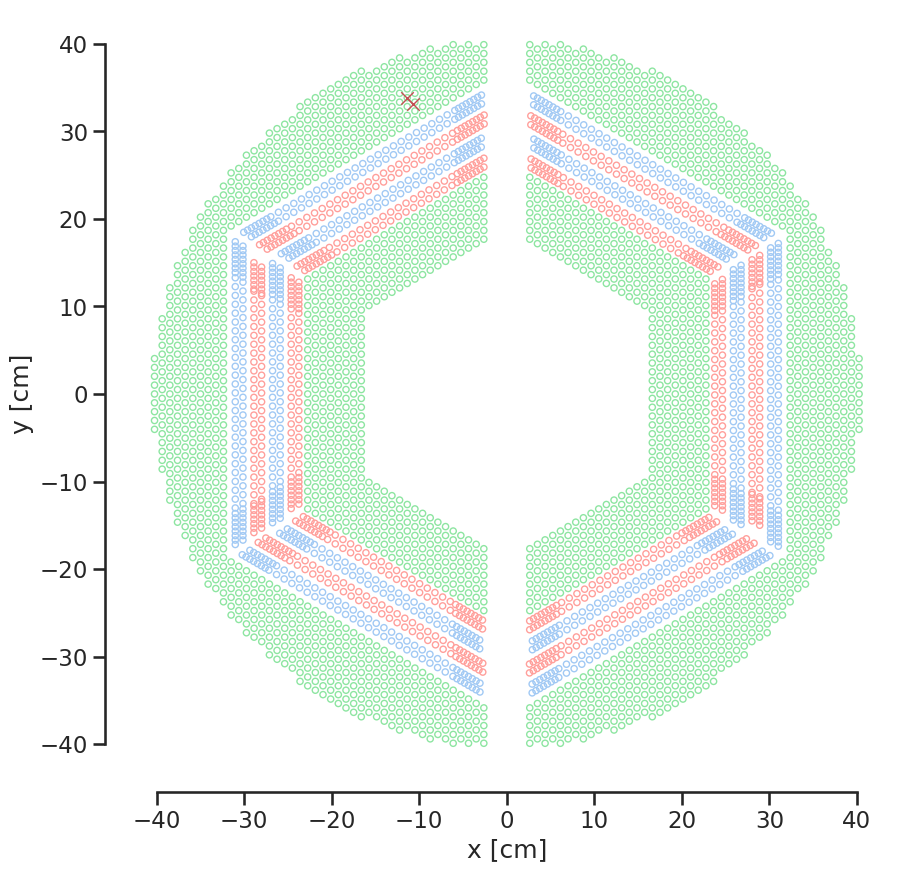

In [54]:
fig, ax = plot_stt()
ax.scatter(
    stt_point["X"][mc_point_ids],
    stt_point["Y"][mc_point_ids],
    marker="x",
    c="r",
    linewidths=1,
)
# plt.show()

print(isochronePerTrack[multi_hit_track_id[0]][multi_hit_id[multi_hit_track_id[0]][0]])
print(isochronePerTrack[multi_hit_track_id[0]][multi_hit_id[multi_hit_track_id[0]][1]])

# Set the image path and name and save the image as a png and pdf
image_prefix = event_image_path_name + "/multiHit_mcPoints_" + str(entry_id)
print("Saving png image to: ", image_prefix + ".png")
plt.savefig(image_prefix + ".png", dpi=300, bbox_inches="tight")
print("Saving pdf image to: ", image_prefix + ".pdf")
plt.savefig(image_prefix + ".pdf", dpi=300, bbox_inches="tight")

In:  [0.02861533 0.34128897] [-0.49918049 -0.3654064 ]
Out:  [-0.4913414  -0.33463402] [0.09264788 0.37151053]
[0.0150745  0.31510255]
Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/mum5mup5/digi/event/multiHit_tubeIO_6.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/mum5mup5/digi/event/multiHit_tubeIO_6.pdf


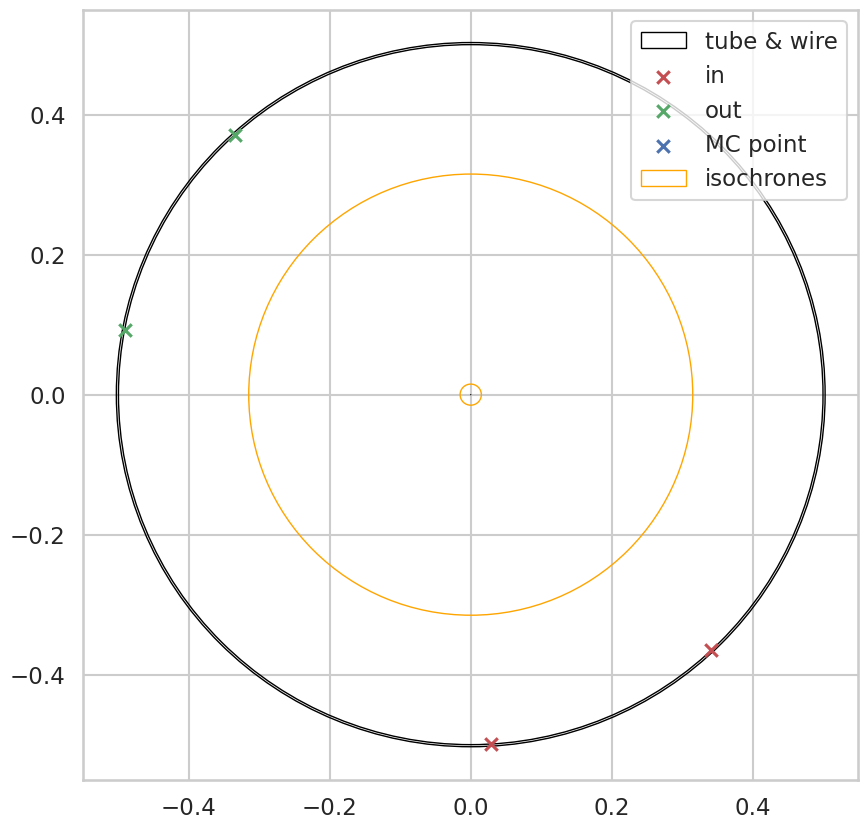

In [55]:
x_points = stt_point["X"][mc_point_ids] - stt_geo.x[tube_id - 1]
y_points = stt_point["Y"][mc_point_ids] - stt_geo.y[tube_id - 1]

sns.set_theme(style="whitegrid", context="talk")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
tube = Circle((0, 0), 0.5, fill=False, edgecolor="black", linewidth=1)
ax.add_artist(tube)
tube = Circle(
    (0, 0), 0.503, fill=False, edgecolor="black", linewidth=1, label="tube & wire"
)
ax.add_artist(tube)
wire = Circle(
    (0, 0),
    0.001,
    fill=True,
    color="k",
    linewidth=0,
)
ax.add_artist(wire)
print("In: ",stt_point["X_in_local"][mc_point_ids], stt_point["Y_in_local"][mc_point_ids])
ax.scatter(
    stt_point["X_in_local"][mc_point_ids],
    stt_point["Y_in_local"][mc_point_ids],
    c="r",
    marker="x",
    label="in",
)
print("Out: ",stt_point["X_out_local"][mc_point_ids], stt_point["Y_out_local"][mc_point_ids])
ax.scatter(
    stt_point["X_out_local"][mc_point_ids],
    stt_point["Y_out_local"][mc_point_ids],
    c="g",
    marker="x",
    label="out",
)
ax.scatter(x_points, y_points, c="b", marker="x", label="MC point")
isochrone = Circle(
    (0, 0),
    stt_hit["Isochrone"][mc_point_ids[0]],
    fill=False,
    edgecolor="orange",
    linewidth=1,
)
print(stt_hit["Isochrone"][mc_point_ids[[1,0]]])
ax.add_artist(isochrone)
isochrone = Circle(
    (0, 0),
    stt_hit["Isochrone"][mc_point_ids[1]],
    fill=False,
    edgecolor="orange",
    linewidth=1,
    label="isochrones",
)
ax.add_artist(isochrone)
ax.set_xlim(-0.55, 0.55)
ax.set_ylim(-0.55, 0.55)
ax.legend()
# plt.show()

# Set the image path and name and save the image as a png and pdf
image_prefix = event_image_path_name + "/multiHit_tubeIO_" + str(entry_id)
print("Saving png image to: ", image_prefix + ".png")
plt.savefig(image_prefix + ".png", dpi=300, bbox_inches="tight")
print("Saving pdf image to: ", image_prefix + ".pdf")
plt.savefig(image_prefix + ".pdf", dpi=300, bbox_inches="tight")

Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/mum5mup5/digi/event/nonMultiHit_tubeIO_6.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/mum5mup5/digi/event/nonMultiHit_tubeIO_6.pdf


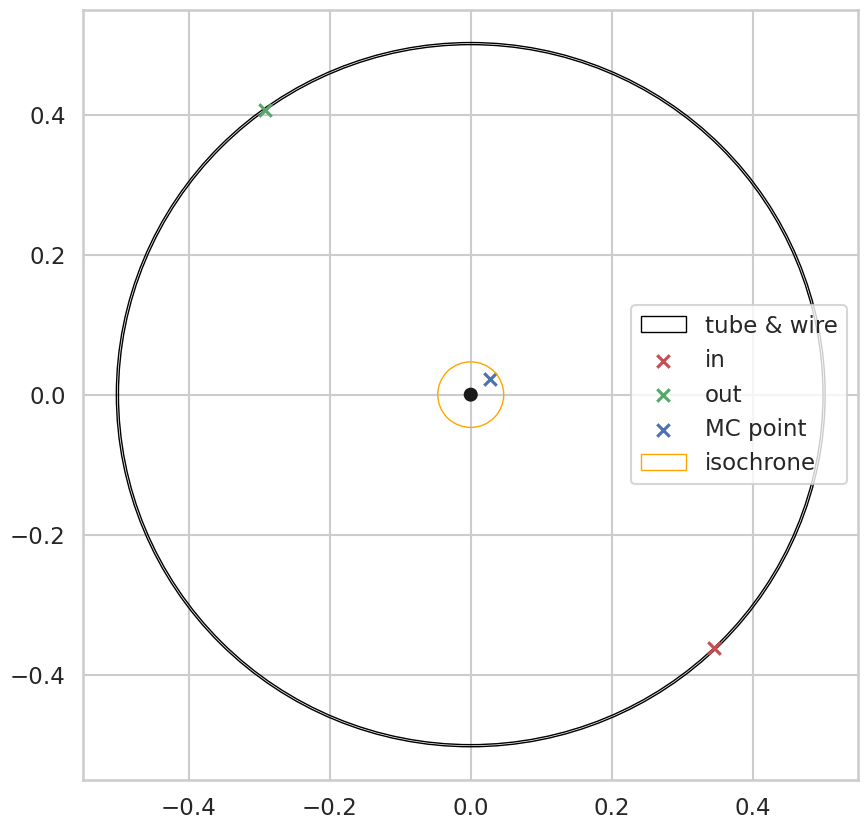

In [56]:
x_points = stt_point["X"][0] - stt_geo.x[stt_point["TubeID"][0]-1]
y_points = stt_point["Y"][0] - stt_geo.y[stt_point["TubeID"][0]-1]

sns.set_theme(style="whitegrid", context="talk")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
tube = Circle((0, 0), 0.5, fill=False, edgecolor="black", linewidth=1)
ax.add_artist(tube)
tube = Circle(
    (0, 0), 0.503, fill=False, edgecolor="black", linewidth=1, label="tube & wire"
)
ax.add_artist(tube)
wire = Circle(
    (0, 0),
    0.01,
    fill=True,
    color="k",
    linewidth=0,
)
ax.add_artist(wire)
ax.scatter(
    stt_point["X_in_local"][0],
    stt_point["Y_in_local"][0],
    c="r",
    marker="x",
    label="in",
)
ax.scatter(
    stt_point["X_out_local"][0],
    stt_point["Y_out_local"][0],
    c="g",
    marker="x",
    label="out",
)
ax.scatter(x_points, y_points, c="b", marker="x", label="MC point")
isochrone = Circle(
    (0, 0),
    stt_hit["Isochrone"][0],
    fill=False,
    edgecolor="orange",
    linewidth=1,
    label="isochrone"
)
ax.add_artist(isochrone)
ax.set_xlim(-0.55, 0.55)
ax.set_ylim(-0.55, 0.55)
ax.legend()
# plt.show()

# Set the image path and name and save the image as a png and pdf
image_prefix = event_image_path_name + "/nonMultiHit_tubeIO_" + str(entry_id)
print("Saving png image to: ", image_prefix + ".png")
plt.savefig(image_prefix + ".png", dpi=300, bbox_inches="tight")
print("Saving pdf image to: ", image_prefix + ".pdf")
plt.savefig(image_prefix + ".pdf", dpi=300, bbox_inches="tight")

In [57]:
hit_df = pd.DataFrame(
    {
        "isochrone": stt_hit["Isochrone"],
        "dep_charge": stt_hit["DepCharge"],
        "ref_id": stt_hit["RefIndex"],
    }
)

point_df = pd.DataFrame(
    {
        "x": stt_point["X"],
        "y": stt_point["Y"],
        "z": stt_point["Z"],
        "x_in": stt_point["X_in_local"],
        "y_in": stt_point["Y_in_local"],
        "z_in": stt_point["Z_in_local"],
        "x_out": stt_point["X_out_local"],
        "y_out": stt_point["Y_out_local"],
        "z_out": stt_point["Z_out_local"],
        "tube_id": stt_point["TubeID"],
    }
)

df = pd.merge(hit_df, point_df, left_on="ref_id", right_index=True)
df["r_in"] = np.sqrt(df["x_in"] ** 2 + df["y_in"] ** 2)
df["r_out"] = np.sqrt(df["x_out"] ** 2 + df["y_out"] ** 2)
df.drop(columns=["ref_id"], inplace=True)
zero_dep_charge_df = df[df["dep_charge"] == 0]
print(zero_dep_charge_df.head())
new_df = df.query("r_in < 0.499 | r_out < 0.499")
print(df.head())
print(new_df.head())

     isochrone  dep_charge         x          y          z      x_in  \
145   0.474935         0.0 -5.937072  26.577435  41.991718 -0.463532   

         y_in     z_in    x_out     y_out     z_out  tube_id      r_in  r_out  
145 -0.170062 -1.55107 -0.48177 -0.133783 -1.491096     1415  0.493744    0.5  
   isochrone    dep_charge          x          y          z      x_in  \
0   0.046808  6.903868e+06 -13.967905  11.132469   8.579681  0.345656   
1   0.390754  5.036756e+06 -14.561438  11.860119   9.017507  0.499984   
2   0.211547  7.963974e+06 -15.049518  12.487113   9.387885  0.091300   
3   0.174793  1.101241e+07 -15.606973  13.230783   9.821160  0.415438   
4   0.422361  3.410371e+06 -16.088499  13.897654  10.204391 -0.188786   

       y_in       z_in     x_out     y_out      z_out  tube_id  r_in  r_out  
0 -0.361278 -26.652857 -0.291526  0.406217 -26.187779       14   0.5    0.5  
1  0.003988 -26.126111  0.116453  0.486250 -25.838877      119   0.5    0.5  
2 -0.491594 -25.819857

Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/mum5mup5/digi/event/wrongIO_tubeIO_6.png


Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/mum5mup5/digi/event/wrongIO_tubeIO_6.pdf


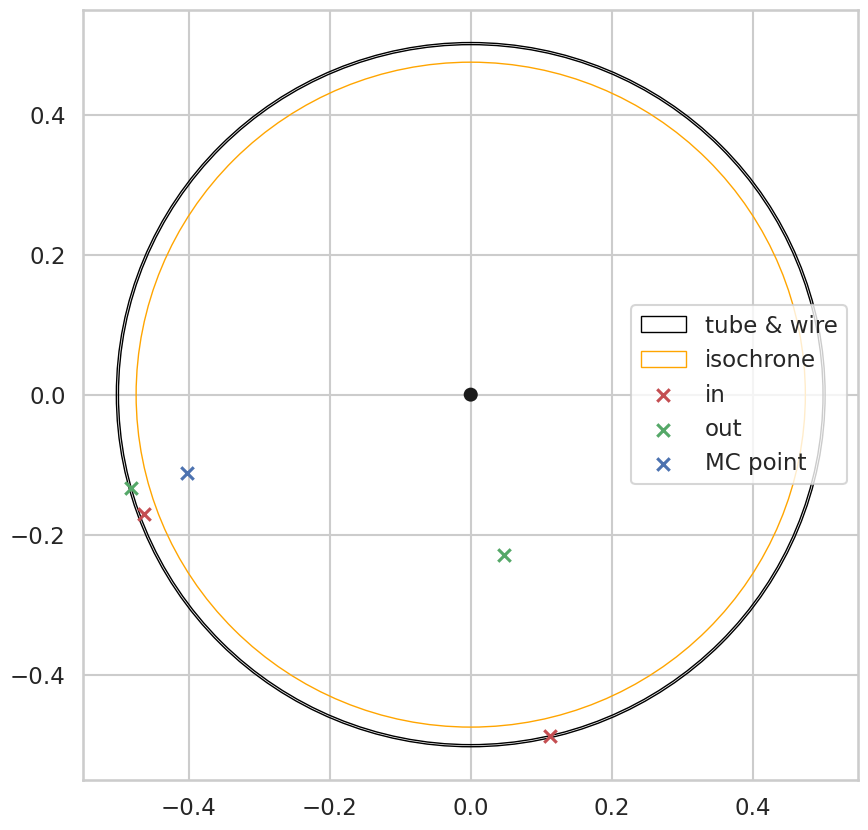

In [58]:
sns.set_theme(style="whitegrid", context="talk")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
tube = Circle((0, 0), 0.5, fill=False, edgecolor="black", linewidth=1)
ax.add_artist(tube)
tube = Circle(
    (0, 0), 0.503, fill=False, edgecolor="black", linewidth=1, label="tube & wire"
)
ax.add_artist(tube)
wire = Circle(
    (0, 0),
    0.01,
    fill=True,
    color="k",
    linewidth=0,
)
ax.add_artist(wire)
isochrone = Circle(
    (0, 0),
    new_df.isochrone.iloc[0],
    fill=False,
    edgecolor="orange",
    linewidth=1,
    label="isochrone",
)
ax.add_artist(isochrone)
ax.scatter(
    new_df.x_in,
    new_df.y_in,
    c="r",
    marker="x",
    label="in",
)
ax.scatter(
    new_df.x_out, new_df.y_out, c="g", marker="x", label="out"
)
local_x = new_df.x.iloc[0] - stt_geo.x[new_df.tube_id - 1]
local_y = new_df.y.iloc[0] - stt_geo.y[new_df.tube_id - 1]
ax.scatter(local_x, local_y, c="b", marker="x", label="MC point")
ax.legend()

ax.set_xlim(-0.55, 0.55)
ax.set_ylim(-0.55, 0.55)

# Set the image path and name and save the image as a png and pdf
image_prefix = event_image_path_name + "/wrongIO_tubeIO_" + str(entry_id)
print("Saving png image to: ", image_prefix + ".png")
plt.savefig(image_prefix + ".png", dpi=300, bbox_inches="tight")
print("Saving pdf image to: ", image_prefix + ".pdf")
plt.savefig(image_prefix + ".pdf", dpi=300, bbox_inches="tight")

Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/mum5mup5/digi/event/zerDepCharge_tubeIO_6.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/mum5mup5/digi/event/zerDepCharge_tubeIO_6.pdf


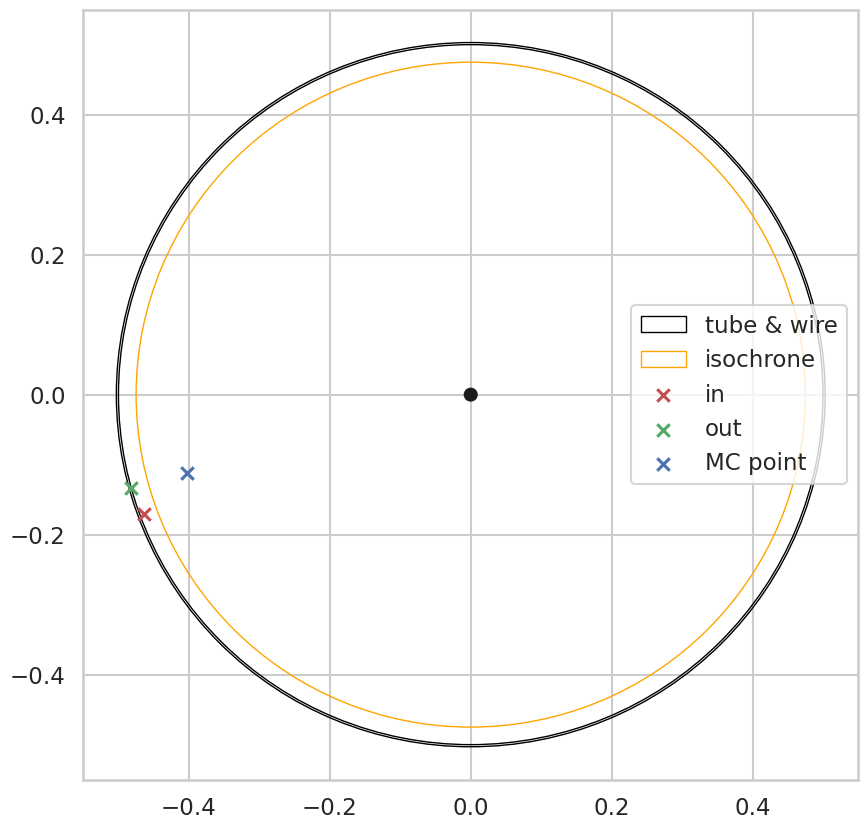

In [59]:
sns.set_theme(style="whitegrid", context="talk")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
tube = Circle((0, 0), 0.5, fill=False, edgecolor="black", linewidth=1)
ax.add_artist(tube)
tube = Circle(
    (0, 0), 0.503, fill=False, edgecolor="black", linewidth=1, label="tube & wire"
)
ax.add_artist(tube)
wire = Circle(
    (0, 0),
    0.01,
    fill=True,
    color="k",
    linewidth=0,
)
ax.add_artist(wire)
isochrone = Circle(
    (0, 0),
    zero_dep_charge_df.isochrone.iloc[0],
    fill=False,
    edgecolor="orange",
    linewidth=1,
    label="isochrone",
)
ax.add_artist(isochrone)
ax.scatter(
    zero_dep_charge_df.x_in,
    zero_dep_charge_df.y_in,
    c="r",
    marker="x",
    label="in",
)
ax.scatter(
    zero_dep_charge_df.x_out, zero_dep_charge_df.y_out, c="g", marker="x", label="out"
)
local_x = zero_dep_charge_df.x.iloc[0] - stt_geo.x[zero_dep_charge_df.tube_id - 1]
local_y = zero_dep_charge_df.y.iloc[0] - stt_geo.y[zero_dep_charge_df.tube_id - 1]
ax.scatter(local_x, local_y, c="b", marker="x", label="MC point")
ax.legend()

ax.set_xlim(-0.55, 0.55)
ax.set_ylim(-0.55, 0.55)

# Set the image path and name and save the image as a png and pdf
image_prefix = event_image_path_name + "/zerDepCharge_tubeIO_" + str(entry_id)
print("Saving png image to: ", image_prefix + ".png")
plt.savefig(image_prefix + ".png", dpi=300, bbox_inches="tight")
print("Saving pdf image to: ", image_prefix + ".pdf")
plt.savefig(image_prefix + ".pdf", dpi=300, bbox_inches="tight")

#### 4.2.1 Tag Signal Particles

Specify the PDG MC IDs and VMC process codes corresponding to a signal particle

In [60]:
# Combine mother IDs and second mother IDs
mother_ids = get_all_mother_ids(mc_track["MotherID"], mc_track["SecondMotherID"])

# Iterate over all tracks that have hits in the STT
for track_id in xPosPerTrack:
    # Get the VMC process codes and PDG MC IDs for the track
    process_mc_ids, process_ids = get_process_ids(
        mc_track["Process"], mother_ids, mc_track["PdgCode"], int(track_id)
    )
    # Check if the track belongs to a signal particle
    print(
        "Is signal particle: ",
        is_signal_particle(
            process_mc_ids, process_ids, signal_processes, signal_process_ids
        ),
    )
    # Get and print the process leading to the track
    process_tex_str = get_process_tex_str(process_mc_ids)
    display(Latex(f"{process_tex_str}"))

Is signal particle:  True


<IPython.core.display.Latex object>

Is signal particle:  True


<IPython.core.display.Latex object>

Is signal particle:  True


<IPython.core.display.Latex object>

Is signal particle:  True


<IPython.core.display.Latex object>

Is signal particle:  True


<IPython.core.display.Latex object>

Is signal particle:  True


<IPython.core.display.Latex object>

Is signal particle:  True


<IPython.core.display.Latex object>

Is signal particle:  True


<IPython.core.display.Latex object>

Is signal particle:  True


<IPython.core.display.Latex object>

Is signal particle:  True


<IPython.core.display.Latex object>

## Plots

### Plot xy-Projections with color maps for various Parameters

#### Set the Parameters for the Plots

Min charge:  1e-10
Max charge:  125537164.27083956
Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/mum5mup5/digi/event/xyProjectionDepCharge_6.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/mum5mup5/digi/event/xyProjectionDepCharge_6.pdf


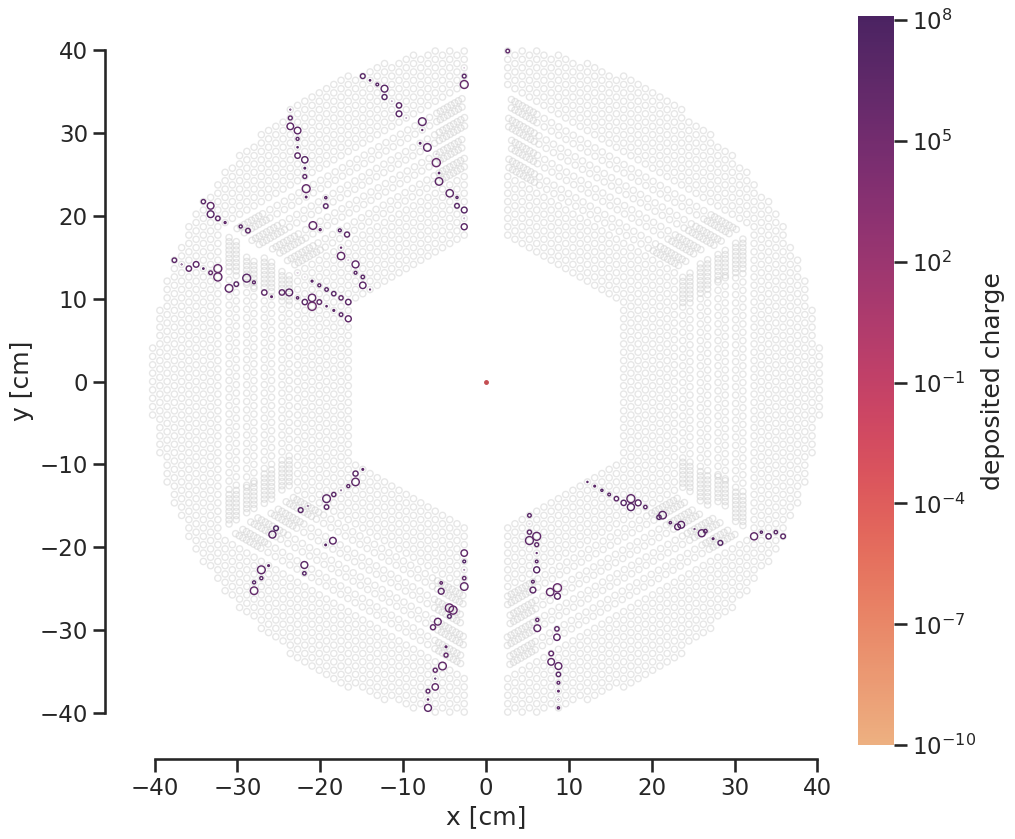

In [61]:
min_c = np.min(stt_hit["DepCharge"]) + 1e-10
print("Min charge: ", min_c)

max_c = np.max(stt_hit["DepCharge"])
print("Max charge: ", max_c)

# Create a normalization object
cNorm = mcolors.LogNorm(vmin=min_c, vmax=max_c)

cmap = sns.color_palette("flare", as_cmap=True)

# Create a figure and axis with the STT tube layout in gray
fig, ax = plot_stt(useGrayScale=True, alpha=0.5)

# Plot the IP
ax.plot(0, 0, marker=".", ms=5, color="r")

colors = sns.color_palette("tab20")

trackNum = 0

numPoint = 0
for i in range(len(stt_hit["Isochrone"])):
    isochrone = Circle(
        (stt_hit["X"][i], stt_hit["Y"][i]),
        stt_hit["Isochrone"][i],
        ec=cmap(cNorm(stt_hit["DepCharge"][i])),
        lw=1,
        fc="None",
    )
    ax.add_patch(isochrone)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = fig.colorbar(
    plt.cm.ScalarMappable(norm=cNorm, cmap=cmap),
    cax=cax,
    orientation="vertical",
    label="deposited charge",
)

cbar.outline.set_visible(False)

# Set the image path and name and save the image as a png and pdf
image_prefix = event_image_path_name + "/xyProjectionDepCharge_" + str(entry_id)
print("Saving png image to: ", image_prefix + ".png")
plt.savefig(image_prefix + ".png", dpi=300, bbox_inches="tight")
print("Saving pdf image to: ", image_prefix + ".pdf")
plt.savefig(image_prefix + ".pdf", dpi=300, bbox_inches="tight")

Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/mum5mup5/digi/event/xyProjectionIsochrone_6.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/mum5mup5/digi/event/xyProjectionIsochrone_6.pdf


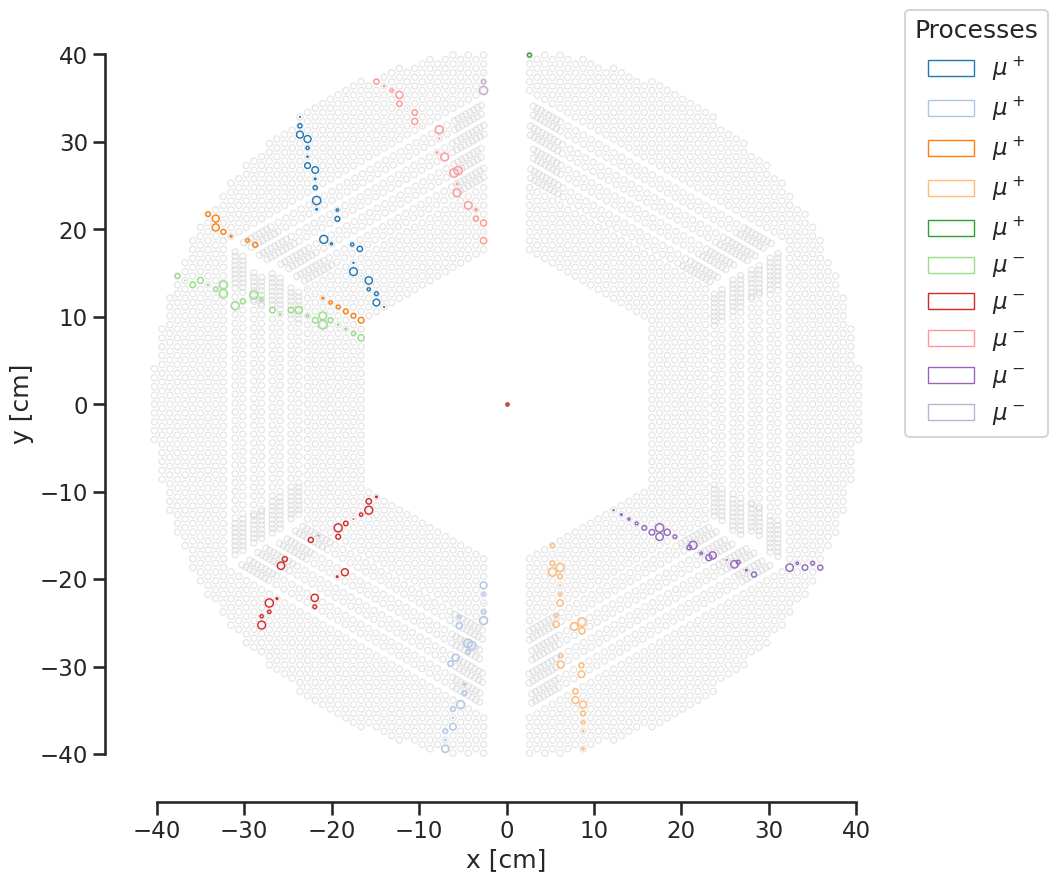

In [62]:
# Create a figure and axis with the STT tube layout in gray
fig, ax = plot_stt(useGrayScale=True, alpha=0.5)

# Plot the IP
ax.plot(0, 0, marker=".", ms=5, color="r")

colors = sns.color_palette("tab20")

trackNum = 0

for trackID in isochronePerTrack:
    pdg_mc_ids, process_codes = get_process_ids(
        process_ids=mc_track["Process"],
        mother_ids=mother_ids,
        pdg_ids=mc_track["PdgCode"],
        particle_id=int(trackID),
    )
    # Create a label for the track based on the PDG MC IDs
    track_label = get_process_tex_str(process_mc_ids=pdg_mc_ids)

    numPoint = 0
    for i in range(len(isochronePerTrack[trackID])):
        if numPoint == 0:
            isochrone = Circle(
                (xPosPerTrack[trackID][i], yPosPerTrack[trackID][i]),
                isochronePerTrack[trackID][i],
                ec=colors[trackNum],
                lw=1,
                fc="None",
                label=track_label,
            )
        else:
            isochrone = Circle(
                (xPosPerTrack[trackID][i], yPosPerTrack[trackID][i]),
                isochronePerTrack[trackID][i],
                ec=colors[trackNum],
                lw=1,
                fc="None",
            )
        ax.add_patch(isochrone)
        numPoint += 1
    trackNum += 1

fig.legend(title="Processes", loc="upper left", bbox_to_anchor=(0.9, 0.9))

# Set the image path and name and save the image as a png and pdf
image_prefix = event_image_path_name + "/xyProjectionIsochrone_" + str(entry_id)
print("Saving png image to: ", image_prefix + ".png")
plt.savefig(image_prefix + ".png", dpi=300, bbox_inches="tight")
print("Saving pdf image to: ", image_prefix + ".pdf")
plt.savefig(image_prefix + ".pdf", dpi=300, bbox_inches="tight")